In [3]:
# import dependencies
import pandas as pd
#from apiKey import api_key
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [44]:
# pull data from csv
file_one = "Resources/highest_grossing_movies.csv"
df = pd.read_csv(file_one)
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [45]:
# create a list to loop through the top1000
titles = df['Title'].str[:-7].values.tolist()


In [46]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [47]:
# Interacting with the API
url = f'http://www.omdbapi.com/?apikey={api_key}&t='
# make a list to append json data
title = 'Star Wars: Episode VII - The Force Awakens'
rt_movies_ls = [] # we'll turn this into a data frame? 
imdb_movies_ls = []
director_ls = []
actor_ls = []
title_ls = []
year_ls = []
rated_ls = []
length_ls = []
movie_json = requests.get(url + title).json()
movie_json

# request limit is 1000 daily
# we need to cut list down to 100

NameError: name 'api_key' is not defined

In [48]:
#
for title in titles[:500]:
    try:
        # access json data
        movie_json = requests.get(url + title).json()
        movie_ratings_rt = movie_json['Ratings'][1]['Value']
        movie_ratings_imdb = movie_json['imdbRating']
        movie_director = movie_json['Director']
        movie_actors = movie_json['Actors']
        movie_year = movie_json['Year']
        movie_rating = movie_json['Rated']
        movie_length = movie_json['Runtime']
        #append json to movie_ls list
        rt_movies_ls.append(movie_ratings_rt)
        imdb_movies_ls.append(movie_ratings_imdb)
        director_ls.append(movie_director)
        actor_ls.append(movie_actors)
        title_ls.append(title)
        year_ls.append(movie_year)
        rated_ls.append(movie_rating)
        length_ls.append(movie_length)
    except:
        pass
# convert movie list into data frame
movie_json

NameError: name 'movie_json' is not defined

In [12]:


#print(title_ls[0])
#print(actor_ls[0])
#print(director_ls[0])

#print(year_ls[0])
#print(rt_movies_ls[0])
#print(imdb_movies_ls[0])




Star Wars: Episode VII - The Force Awakens
Daisy Ridley, John Boyega, Oscar Isaac
J.J. Abrams
2015
93%
7.8


In [41]:
full_moviels_df = pd.DataFrame()
full_moviels_df['Title'] = title_ls
full_moviels_df['World Sales'] = df['World Sales (in $)']
full_moviels_df['Year Released'] = year_ls
full_moviels_df['Rotten Tomatoes Score'] = rt_movies_ls
full_moviels_df['IMDB Score'] = imdb_movies_ls
full_moviels_df['Director(s)'] = director_ls
full_moviels_df['Headlining Actor(s)'] = actor_ls
full_moviels_df['Studio'] = df['Distributor']
full_moviels_df['Runtime'] = length_ls
full_moviels_df['Rating'] = rated_ls
full_moviels_df['Genre'] = df['Genre']
full_moviels_df.head()   

NameError: name 'title_ls' is not defined

In [1]:
full_moviels_df.to_csv("Output/Movie_Data.csv")

NameError: name 'full_moviels_df' is not defined

In [38]:
# convert movie list into data frame
#movie_list_df = pd.DataFrame(movies_ls)
#movie_list_df["Metacritic Rating"] = movie_list_df[2]['Value']
#movie_list_df

,0
0,93%
1,94%
2,82%
3,96%
4,85%


In [18]:
# merge dataframes

In [ ]:
# Bar Graphs on directors  sales, actors  sales,  studio sales,
# Combine list of actors into 1 large list to run a count of how many times an actor appears across all movies on list

#MK

In [ ]:
# Line plot for movie genre performance over time

#RM

In [ ]:
# Bar chart for movie rated vs. box office

#EP

In [ ]:
# Pie chart of Genre Percentage in top grossing

#DV

In [15]:
# Scatter plot for audience reception vs. sales
# Scatter plot for critic reception vs. sales
df = pd.read_csv("Output/Movie_Data.csv")
df.head()


,Unnamed: 0,Title,World Sales,Year Released,Rotten Tomatoes Score,IMDB Score,Director(s),Headlining Actor(s),Studio,Runtime,Rating,Genre
0,0,Star Wars: Episode VII - The Force Awakens,2069521700,2015,93%,7.8,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac",Walt Disney Studios Motion Pictures,138 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"
1,1,Avengers: Endgame,2797501328,2019,94%,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo",Walt Disney Studios Motion Pictures,181 min,PG-13,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,2,Avatar,2847246203,2009,82%,7.9,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",Twentieth Century Fox,162 min,PG-13,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
3,3,Black Panther,1347597973,2018,96%,7.3,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Walt Disney Studios Motion Pictures,134 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"
4,4,Avengers: Infinity War,2048359754,2018,85%,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffalo",Walt Disney Studios Motion Pictures,149 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"


In [16]:
# Formatting with a function that calls a loop
# this one removes the percentage signs
# further, data types are inconsistent
def format_score(x):
    if '%' in x:# removes the percentage sign
        return x.split('%')[0]
    elif '/' in x:# this one was for those'XX/100'
        return x.split('/')[0]
    elif '–' in x:# the split one
        return x.split('–')[0] #the wierd one 
    elif x is None:
        return None
df['Rotten Tomatoes Score'].head()

0    93%
1    94%
2    82%
3    96%
4    85%
Name: Rotten Tomatoes Score, dtype: object

In [17]:
# Call the above formula, the idea for mapping and using lambda
# came from a previous tutoring session
df["Rotten Tomatoes Score"] = df["Rotten Tomatoes Score"].map(lambda x: format_score(x))
df["Rotten Tomatoes Score"] = pd.to_numeric(df["Rotten Tomatoes Score"])
df['Rotten Tomatoes Score'].head()

0    93
1    94
2    82
3    96
4    85
Name: Rotten Tomatoes Score, dtype: int64

In [18]:
# Formatting the IMDB scores
df['IMDB Score'] = df.apply(lambda x: x['IMDB Score'] * 10, axis=1)

In [19]:
df["IMDB Score"].head()

0    78.0
1    84.0
2    79.0
3    73.0
4    84.0
Name: IMDB Score, dtype: float64

y = 9380630.74x + -109890544.06


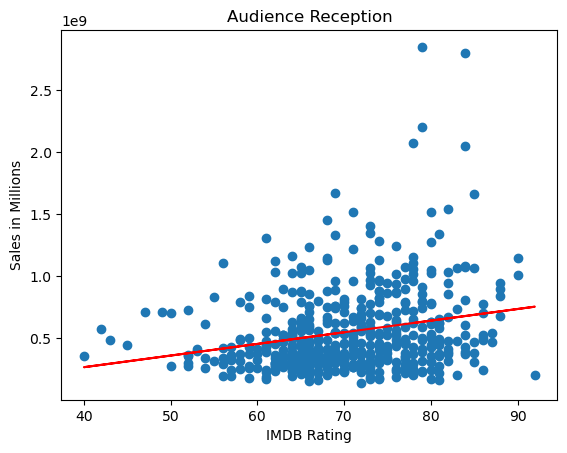

In [28]:
# sales (y value)
plt.scatter(df['IMDB Score'], df['World Sales'
                                ])
# line of regression
x_values = df['IMDB Score']
y_values = df['World Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


# Labels
plt.ylabel("Sales in Millions")
plt.xlabel("IMDB Rating")
plt.title('Audience Reception')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(line_eq)

Text(0.5, 1.0, 'Critical Reception')

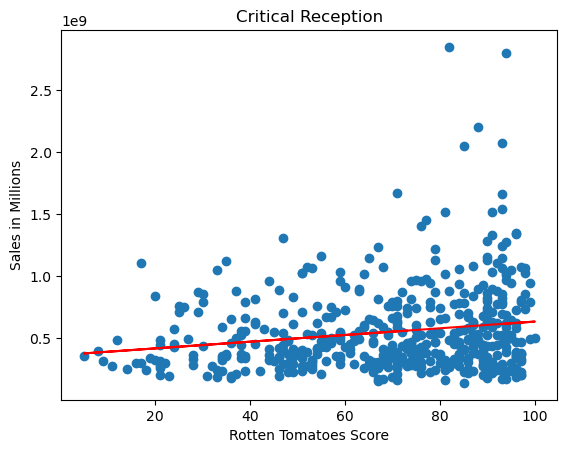

In [42]:
# isolate audience response (rotten Tomatoes)
# sales (y value)
plt.scatter(df['Rotten Tomatoes Score'], df['World Sales'
                                ])
# sales (y value)

# line of regression
x_values = df['Rotten Tomatoes Score']
y_values = df['World Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


# Labels
plt.ylabel("Sales in Millions")
plt.xlabel("Rotten Tomatoes Score")
plt.title('Critical Reception')
#plt.savefig('line_plot.pdf')